**Brief Honor Code**. Do the homework on your own. You may discuss ideas with your classmates, but DO NOT copy the solutions from someone else or the Internet. If stuck, discuss with TA.

**1**. (50 points)

Write separate `toolz` pipelines to generate the following variables

- words: a list of all the words in the files `fortune?.txt` in the `data` directory
- reverse_index: a reverse index of words (key=position, value=word)
- index: an index of words (key=word, value=position)
- cat: a list containing the categorical encoding of words

Finally, use `numpy` to convert `cat` into a one-hot matrix with shape (#words, #unique words)

In [54]:
import glob
import os
import string
import toolz as tz
import toolz.curried as c
import numpy as np
from functools import partial


In [69]:
paths = glob.glob(os.path.join('data', 'fortune?.txt') )

doc_terms = tz.pipe(
    paths,
    c.map(partial(open)),
    c.map(lambda x: x.read()),
    c.map(lambda x: x.translate(str.maketrans(string.ascii_uppercase, string.ascii_lowercase, string.punctuation))),
    c.mapcat(lambda x: x.split()),
    list
)
doc_terms

['you',
 'will',
 'receive',
 'a',
 'fortune',
 'cookie',
 'some',
 'fortune',
 'cookies',
 'contain',
 'no',
 'fortune',
 'don’t',
 'let',
 'statistics',
 'do',
 'a',
 'number',
 'on',
 'you',
 'you',
 'are',
 'not',
 'illiterate',
 'may',
 'you',
 'someday',
 'be',
 'carbon',
 'neutral',
 'you',
 'have',
 'rice',
 'in',
 'your',
 'teeth',
 'avoid',
 'taking',
 'unnecessary',
 'gambles',
 'lucky',
 'numbers',
 '12',
 '15',
 '23',
 '28',
 '37',
 'ask',
 'your',
 'mom',
 'instead',
 'of',
 'a',
 'cookie',
 'this',
 'cookie',
 'contains',
 '117',
 'calories',
 'hard',
 'work',
 'pays',
 'off',
 'in',
 'the',
 'future',
 'laziness',
 'pays',
 'off',
 'now',
 'you',
 'think',
 'it’s',
 'a',
 'secret',
 'but',
 'they',
 'know',
 'if',
 'a',
 'turtle',
 'doesn’t',
 'have',
 'a',
 'shell',
 'is',
 'it',
 'naked',
 'or',
 'homeless',
 'change',
 'is',
 'inevitable',
 'except',
 'for',
 'vending',
 'machines',
 'don’t',
 'eat',
 'the',
 'paper',
 'you',
 'will',
 'live',
 'long',
 'enough',
 't

In [74]:
reverse_index = tz.pipe(
    doc_terms,
    tz.unique,
    enumerate, 
    dict    
)
reverse_index

{0: 'you',
 1: 'will',
 2: 'receive',
 3: 'a',
 4: 'fortune',
 5: 'cookie',
 6: 'some',
 7: 'cookies',
 8: 'contain',
 9: 'no',
 10: 'don’t',
 11: 'let',
 12: 'statistics',
 13: 'do',
 14: 'number',
 15: 'on',
 16: 'are',
 17: 'not',
 18: 'illiterate',
 19: 'may',
 20: 'someday',
 21: 'be',
 22: 'carbon',
 23: 'neutral',
 24: 'have',
 25: 'rice',
 26: 'in',
 27: 'your',
 28: 'teeth',
 29: 'avoid',
 30: 'taking',
 31: 'unnecessary',
 32: 'gambles',
 33: 'lucky',
 34: 'numbers',
 35: '12',
 36: '15',
 37: '23',
 38: '28',
 39: '37',
 40: 'ask',
 41: 'mom',
 42: 'instead',
 43: 'of',
 44: 'this',
 45: 'contains',
 46: '117',
 47: 'calories',
 48: 'hard',
 49: 'work',
 50: 'pays',
 51: 'off',
 52: 'the',
 53: 'future',
 54: 'laziness',
 55: 'now',
 56: 'think',
 57: 'it’s',
 58: 'secret',
 59: 'but',
 60: 'they',
 61: 'know',
 62: 'if',
 63: 'turtle',
 64: 'doesn’t',
 65: 'shell',
 66: 'is',
 67: 'it',
 68: 'naked',
 69: 'or',
 70: 'homeless',
 71: 'change',
 72: 'inevitable',
 73: 'except

In [75]:
index = tz.pipe(
    zip(reverse_index.values(), reverse_index.keys()),
    dict
)
index

{'117': 46,
 '12': 35,
 '15': 36,
 '23': 37,
 '28': 38,
 '37': 39,
 'a': 3,
 'abort': 193,
 'about': 200,
 'actions': 241,
 'again': 231,
 'alien': 86,
 'all': 119,
 'alone': 170,
 'always': 134,
 'am': 140,
 'an': 85,
 'and': 171,
 'another': 147,
 'appearing': 88,
 'appointment': 250,
 'are': 16,
 'as': 132,
 'ask': 40,
 'at': 100,
 'avalanche': 145,
 'avoid': 29,
 'back': 180,
 'be': 21,
 'because': 245,
 'behave': 185,
 'being': 133,
 'best': 206,
 'but': 59,
 'calories': 47,
 'can': 237,
 'cant': 175,
 'carbon': 22,
 'change': 71,
 'chicken': 128,
 'chinese': 137,
 'closed': 148,
 'cold': 187,
 'conclusion': 152,
 'contain': 8,
 'contains': 45,
 'cookie': 5,
 'cookies': 7,
 'could': 218,
 'cynic': 159,
 'danger': 217,
 'day': 118,
 'die': 169,
 'dirt': 110,
 'disregard': 212,
 'do': 13,
 'doesnt': 224,
 'doesn’t': 64,
 'don’t': 10,
 'dream': 114,
 'dressed': 173,
 'eat': 77,
 'enough': 81,
 'especially': 203,
 'except': 73,
 'factory': 199,
 'fanatic': 174,
 'far': 95,
 'feels': 1

In [76]:
cat = tz.pipe(
    doc_terms,
    c.map(lambda x: index.get(x)),
    list
)
cat

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 4,
 7,
 8,
 9,
 4,
 10,
 11,
 12,
 13,
 3,
 14,
 15,
 0,
 0,
 16,
 17,
 18,
 19,
 0,
 20,
 21,
 22,
 23,
 0,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 27,
 41,
 42,
 43,
 3,
 5,
 44,
 5,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 26,
 52,
 53,
 54,
 50,
 51,
 55,
 0,
 56,
 57,
 3,
 58,
 59,
 60,
 61,
 62,
 3,
 63,
 64,
 24,
 3,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 66,
 72,
 73,
 74,
 75,
 76,
 10,
 77,
 52,
 78,
 0,
 1,
 79,
 80,
 81,
 82,
 83,
 84,
 4,
 7,
 85,
 86,
 43,
 6,
 87,
 1,
 21,
 88,
 82,
 0,
 89,
 13,
 17,
 90,
 91,
 74,
 92,
 93,
 1,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 43,
 105,
 82,
 106,
 100,
 97,
 98,
 99,
 107,
 66,
 108,
 100,
 0,
 97,
 98,
 109,
 110,
 66,
 111,
 112,
 6,
 113,
 114,
 43,
 115,
 116,
 114,
 43,
 7,
 67,
 66,
 3,
 117,
 118,
 82,
 24,
 3,
 117,
 118,
 119,
 115,
 16,
 120,
 73,
 44,
 121,
 122,
 1,
 123,
 0,
 82,
 3,
 124,
 125,
 126,
 127,
 128,
 129,
 66,
 9,


In [77]:
col = len(index)
row = len(cat)
m = np.zeros((row, col), dtype='int')
i = np.arange(row)
m[i, cat] = 1
m

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]])

**2**. (50 points)

Write a simulation of diffusion-limited aggregation. In this simulation, we have $n$ random walkers. Each walker starts from row 0 and a random column number, and in each step, the walker increases the row number by 1 and randomly increments or decrements its column number by 1. If the column number of the walker exceeds the maximum or becomes negative, the walker emerges on the other side (toroidal boundary conditions). At any time, if any of the walkers 8 neighbors is non-zero, the walker stops in that position, and the number of steps taken is recorded in that (row, column).

Write a function `dla(nwalkers, width, height, seed)` that returns a matrix with shape (width, height) after running `nwalkers` random walks as described above. The argument `ssed` is used to initialize a random number seed. Internally, the function should create a (width, height+1) matrix, and initialize the last row to have 1 with all other entries 0.

Feel free to use loops. This function is not easily vectorized.

Plot the returned matrix for the arguments `nwalkers=10000, width=300, height=150, seed=123`. It should look like this:

![dla](figs/dla.png)

In [78]:
import numpy as np
import matplotlib.pyplot as plt

In [79]:
def generate_walker(width):
    """generate a walker in row0 and random columns"""
    
    ori_col = np.random.randint(0, width)
    return (0, ori_col)
    

In [80]:
def generate_oriM(height, width):
    """generate the original matrix"""
    
    ori_M = np.zeros((height + 1, width), dtype='int')
    ori_M[-1,:] = 1
    return ori_M

In [81]:
def walk_track(i, walk, width):
    """track the step of one walker"""
    
    direction = np.random.choice([1, -1])
    if walk[-1] + direction < 0:               #boundary condition
        walk = (i, width-1)
    elif walk[-1] + direction > width-1:
        walk = (i, 0)
    else:
        walk = (i, walk[-1] + direction)
    return walk


In [82]:
def stop_condition(walk, new_M, width):
    """stop condition"""
    
    if walk[-1] == 0:
        if (new_M[walk[0], walk[-1]+1]!=0 or new_M[walk[0]-1, walk[-1]]!=0 or new_M[walk[0]-1, walk[-1]+1]!=0
            or new_M[walk[0]+1, walk[-1]]!=0 or new_M[walk[0]+1, walk[-1]+1]!=0):
            answer = 0
        else:
            answer = 1
            
    elif walk[-1] == width-1:
        if (new_M[walk[0], walk[-1]-1]!=0 or new_M[walk[0]-1, walk[-1]-1]!=0 or new_M[walk[0]-1, walk[-1]]!=0 
            or new_M[walk[0]+1, walk[-1]-1]!=0 or new_M[walk[0]+1, walk[-1]]!=0):
            answer = 0
        else:
            answer = 1
    
    else:
        if (new_M[walk[0], walk[-1]-1]!=0 or new_M[walk[0], walk[-1]+1]!=0 or new_M[walk[0]-1, walk[-1]-1]!=0
            or new_M[walk[0]-1, walk[-1]]!=0 or new_M[walk[0]-1, walk[-1]+1]!=0 or new_M[walk[0]+1, walk[-1]-1]!=0
            or new_M[walk[0]+1, walk[-1]]!=0 or new_M[walk[0]+1, walk[-1]+1]!=0):
            answer = 0
        else:
            answer = 1
    
    return answer


In [83]:
def dla(nwalkers, width, height, seed):
    """Simulation of diffusion-limited aggregation"""
    
    np.random.seed(seed)
    ori_M = generate_oriM(height, width)
    new_M = ori_M
    
    for i in range(nwalkers):
        walk = generate_walker(width)
        count_walk = 0
        
        for j in range(1, height):
            walk = walk_track(j, walk, width)
            if stop_condition(walk, new_M, width) == 1:
                count_walk += 1                
            else:
                new_M[walk] = count_walk
                break
    return new_M

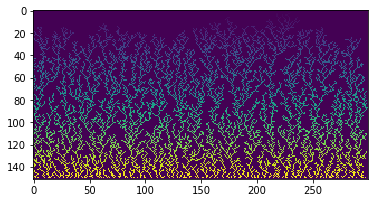

In [86]:
width = 300
height = 150
nwalkers = 10000
seed = 123
M = dla(nwalkers, width, height, seed)
color = np.dstack([M,M,M])
plt.figure()
plt.imshow(color.mean(axis = -1))